# Построение движка для игр на pygame - урок 5

## Повторение

Опишем колизию между персонажем и границами экрана, так что бы персонаж не мог выйти за граници экрана:

In [4]:
from first_engine.game import Game
from first_engine.objects import Object


class FirstGame(Game):

    def run(self):

        hero = Object(parent=self.surface, speed=4)

        while self.RUNNER:
            self.fps_counter(60)
            self.display_update()
            self.window_fill()

            hero.blit()
            hero.motion_control() # даем ему возмоdжность перемещаться
            
            # тут все очень тривиально
            if hero.body.bottom > self.body.bottom: # если низ персонажа ниже нижней части экрана
                hero.body.bottom = self.body.bottom # то низ персонажа становится равен низу экрана
            elif hero.body.top < self.body.top: # иначе если верх персонажа выше верхней части экрана
                hero.body.top = self.body.top # то верх персонажа становится равен верху экрана
            if hero.body.right > self.body.right:
                hero.body.right = self.body.right # и так далее...
            elif hero.body.left < self.body.left:
                hero.body.left = self.body.left
            
            # ну и та как у нас координаты персонажа отделены от координат тела, то будем сопоставлять их
            hero.y, hero.x = hero.body.y, hero.body.x

            for event in self.events():
                # print(event)  # отслеживание событий
                self.close(event)


FirstGame().run()

Добавим этот метод в класс __Game__

In [ ]:
"""
Модуль с основным классом-конструктором Game - для создания игры.
"""

import pygame


class Game:
    ...

    def __init__(self, width=400, height=300, color=(0, 0, 0)):
        ...

    @staticmethod
    def display_update():
        ...

    @staticmethod
    def events():
        ...

    def window_fill(self):
        ...
 
    def fps_counter(self, FPS=30) -> None:
        ...

    def close(self, event) -> None:
        ...

    def window_borders(self, objects): # экран преграждает путь какому либо объекту, что бы он не вышел за границы
        for obj in objects: # будем перечислять все объекты которые нельзя выпускать из экрана
            
            if obj.body.bottom > self.parentBody.bottom:
                obj.body.bottom = self.parentBody.bottom
            elif obj.body.top < self.parentBody.top:
                obj.body.top = self.parentBody.top
                
            if obj.body.right > self.parentBody.right:
                obj.body.right = self.parentBody.right
            elif obj.body.left < self.parentBody.left:
                obj.body.left = self.parentBody.left
                
            obj.y, obj.x = obj.body.y, obj.body.x

Обработать выход одного объекта за пределы другого не сложно, но что если, мы хотим, что бы 2 объекта не могли между собой пересечься?

Давайте попробуем:

In [7]:
from first_engine.game import Game
from first_engine.objects import Object


class FirstGame(Game):

    def run(self):

        hero = Object(parent=self.surface, speed=4) # создаем перса
        wall = Object(self.surface, 
                      x=200, y=100, width=100, height=100, 
                      color=(255, 100, 100)) # создаем преграду

        while self.RUNNER:
            self.fps_counter(60)
            self.window_borders(objects=[hero])
            self.display_update()
            self.window_fill()

            hero.blit() # отрисовываем героя
            hero.motion_control()

            wall.blit() # отрисовываем преградув

            if hero.body.right > wall.body.left: # если правая часть перса нахобится дальше левой части преграды
                hero.body.right = wall.body.left # то правая часть перса становится равна левой части преграды

            for event in self.events():
                # print(event)
                self.close(event)


FirstGame().run()

Можно было бы продолжить, но здесь мы столкнулись с проблемой, герой вообще не может перейти дальше левой части преграды даже если поднимется выше или ниже преграды

Здесь нам нужно обрабатывать колизию между двумя созданными объектами, то есть, когда 1 объект входит в тело другого, то мы получаем сигнал и только после этого обрабатываем свойство преграды

# Задание

Постройте логику так, что бы  исправить баг с невидимой преградой

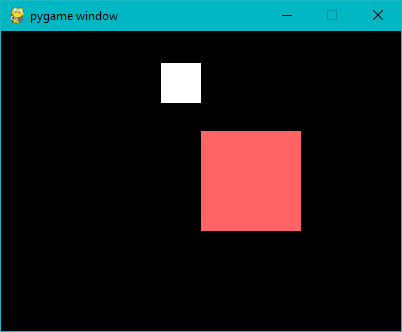

Вообще у объектов Rect уже есть метод для обработки столкновений - colliderect

In [8]:
from first_engine.game import Game
from first_engine.objects import Object


class FirstGame(Game):

    def run(self):

        hero = Object(parent=self.surface, speed=4) # создаем перса
        wall = Object(self.surface, 
                      x=200, y=100, width=100, height=100, 
                      color=(255, 100, 100)) # создаем преграду

        while self.RUNNER:
            self.fps_counter(60)
            self.window_borders(objects=[hero])
            self.display_update()
            self.window_fill()

            hero.blit() # отрисовываем героя
            hero.motion_control()

            wall.blit() # отрисовываем преградув

            # if hero.body.right > wall.body.left and hero.body.left < wall.body.right and \
            #         hero.body.bottom > wall.body.top and hero.body.top < wall.body.bottom:
            if hero.body.colliderect(wall.body):
                if hero.body.right > wall.body.left:  # если правая часть перса нахобится дальше левой части преграды
                    hero.body.right = wall.body.left  # то правая часть перса становится равна левой части преграды

            for event in self.events():
                # print(event)
                self.close(event)


FirstGame().run()

# Задание:
Напишите игру - доджер. Суть игры в том, что с верхней части экрана падают объекты, задача персонажа не столкнуться с объектом.
Реализация игры зависит от вас

In [ ]:
from first_engine.game import Game
from first_engine.objects import Object
import random


class FirstGame(Game):

    def run(self):
        
        hero = Object(parent=self.surface, speed=4, x=180, y=360) # созаем героя
        enemies = [] # отбъявляем список врагов
        
        game_over = False # объявляем конец игры
        
        time_to_spawn = 60 # время до спавна врагов (можно регулировать)
        
        while self.RUNNER:
            if not game_over:
                self.fps_counter(60)
                self.window_borders(objects=[hero]) # не даем персонажу выйти за пределы экрана
                self.display_update()
                self.window_fill()

                hero.blit()
                hero.motion_control()
                
                # CODE

            for event in self.events():
                
                if event.type == 768 and event.key == 114: # при нажатии на R игра начинается заново
                    hero.body.x, hero.body.y = 180, 360 # ставим героя на исходную позицию
                    enemies.clear() # отчищаем список врагов
                    game_over = False # отключаем конец игры
                    
                self.close(event)


FirstGame(width=400, height=400).run()